# Test developing functions

In this notebook I copy the class in development to speed up updates and test classes

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

Import my classes

In [2]:
from scripts.data_loader import DataPipeline
from scripts.pairs_selection import PairSelector
from scripts.visualizations import Visualize

Take data

In [3]:
pipeline = DataPipeline(
    base_folder=r"C:\Users\LucaBenedetti\Documents\personal_dev\long_short_strategy\data"
)
data = pipeline.load_data("wide_sp500")
data.head(3)


Data loaded from C:\Users\LucaBenedetti\Documents\personal_dev\long_short_strategy\data\wide_sp500.csv
Method 'load_data' executed in 0.0433 seconds


,Date,AAPL,ABBV,ABT,ADBE,AMD,AMZN,BAC,BRK-B,CMCSA,...,PYPL,T,TMO,TSLA,TXN,UNH,V,VZ,WMT,XOM
0,2020-01-02,72.796028,71.589767,79.273941,334.429993,49.099998,94.900497,31.472910,228.389999,39.716129,...,110.750000,19.815220,322.474823,28.684000,112.741280,271.775055,184.487305,45.527317,36.782581,55.631165
1,2020-01-03,72.088295,70.910278,78.307518,331.809998,48.599998,93.748497,30.819445,226.179993,39.401005,...,108.760002,19.917206,318.967163,29.534000,111.244667,269.024841,183.020035,45.042583,36.457855,55.183933
2,2020-01-06,72.662720,71.469864,78.717796,333.709991,48.389999,95.143997,30.775280,226.990005,39.103374,...,110.169998,19.937601,321.259521,30.102667,110.470276,270.892426,182.624313,44.945644,36.383640,55.607624


In [4]:
# drop  Date column
data_nodate = data.drop("Date",axis = 1)

## Test PairsSelector class

In [5]:
pair_selector = PairSelector()

In [6]:
dist_matrix = pair_selector.compute_pairwise_distance(data_nodate)
dist_matrix.head()

2025-01-29 20:17:05,790 - INFO - Computing Euclidean distance matrix.


Method 'compute_pairwise_distance' executed in 0.0035 seconds


,AAPL,ABBV,ABT,ADBE,AMD,AMZN,BAC,BRK-B,CMCSA,COST,...,PYPL,T,TMO,TSLA,TXN,UNH,V,VZ,WMT,XOM
AAPL,0.000000,1053.755504,1455.244538,10583.962595,1667.340057,1253.531874,3556.352503,4530.331299,3267.209491,9434.680890,...,2976.494882,4041.758611,11492.757449,2990.122248,775.782639,8872.479170,2361.971614,3343.886327,3121.660512,2345.268879
ABBV,1053.755504,0.000000,871.989315,11532.293684,1116.334920,1624.448016,2687.800170,5401.501340,2423.269337,10319.798074,...,3259.892569,3160.939824,12379.371397,3895.734902,1441.354237,9719.976646,3198.803276,2485.964049,2255.833620,1407.776963
ABT,1455.244538,871.989315,0.000000,11715.609259,693.033272,1321.735975,2275.222322,5811.178986,1963.598834,10747.813328,...,2713.767783,2764.166203,12711.595281,4167.153398,1621.304876,10169.828975,3458.754173,2015.272585,1850.501397,1406.303279
ADBE,10583.962595,11532.293684,11715.609259,0.000000,12016.453604,10529.488979,13940.943530,6546.776056,13611.030752,3895.618735,...,10365.003443,14425.378648,3547.230810,8464.315642,10204.737214,4418.703318,8422.088574,13674.292452,13515.182755,12870.111678
AMD,1667.340057,1116.334920,693.033272,12016.453604,0.000000,1705.692479,2001.273389,6134.621259,1711.404070,11036.924553,...,3099.151884,2487.928805,13052.732737,4334.869814,2027.358801,10493.540940,3848.860930,1797.204882,1598.955119,1203.222531


In [7]:
dist_matrix = pair_selector.compute_distance_correlation(data_nodate)
dist_matrix.head()

2025-01-29 20:17:05,819 - INFO - Distance correlation


Method 'compute_distance_correlation' executed in 0.0056 seconds


,AAPL,ABBV,ABT,ADBE,AMD,AMZN,BAC,BRK-B,CMCSA,COST,...,PYPL,T,TMO,TSLA,TXN,UNH,V,VZ,WMT,XOM
AAPL,0.000000,0.181221,0.391472,0.591175,0.196594,0.827319,0.547332,0.091052,0.803353,0.071141,...,1.304799,1.541248,0.190017,0.208906,0.215743,0.128999,0.240362,1.555341,0.177832,0.271819
ABBV,0.181221,0.000000,0.648785,1.065838,0.560899,1.304500,0.667583,0.109571,1.180426,0.114773,...,1.616398,1.355227,0.296017,0.463586,0.379104,0.047966,0.435733,1.715280,0.340364,0.072443
ABT,0.391472,0.648785,0.000000,0.421675,0.272104,0.419906,0.223152,0.512096,0.373984,0.519912,...,0.621025,1.139159,0.179336,0.200782,0.175766,0.555534,0.521088,0.841509,0.558682,0.876434
ADBE,0.591175,1.065838,0.421675,0.000000,0.278523,0.185018,0.574029,0.741165,0.195506,0.738004,...,0.475330,1.229617,0.642396,0.482700,0.537062,0.925638,0.434619,0.776670,0.572543,1.168827
AMD,0.196594,0.560899,0.272104,0.278523,0.000000,0.487071,0.443634,0.351669,0.509846,0.286772,...,0.960993,1.448587,0.263659,0.191837,0.306211,0.463132,0.380332,1.144093,0.366782,0.699761


In [8]:
dist_matrix, beta_matrix = pair_selector.compute_cointegration_metrics(data_nodate)
print("dist_matrix")
print(dist_matrix.head(3))
print("beta_matrix")
print(beta_matrix.head(3))


2025-01-29 20:17:05,850 - INFO - Integral correlation


Method 'compute_cointegration_metrics' executed in 27.7054 seconds
dist_matrix
          AAPL      ABBV       ABT      ADBE       AMD      AMZN       BAC  \
AAPL       NaN  0.243235  0.119220  0.559501  0.136201  0.331169  0.382994   
ABBV  0.243235       NaN  0.153239  0.475000  0.344502  0.147603  0.370076   
ABT   0.119220  0.153239       NaN  0.496086  0.161872  0.275070  0.006494   

         BRK-B     CMCSA      COST  ...      PYPL         T       TMO  \
AAPL  0.012168  0.523201  0.169586  ...  0.609895  0.000808  0.171773   
ABBV  0.156634  0.440666  0.276766  ...  0.320186  0.001752  0.170511   
ABT   0.814335  0.174291  0.926206  ...  0.859871  0.003967  0.121249   

          TSLA       TXN       UNH         V        VZ       WMT       XOM  
AAPL  0.296926  0.518777  0.111837  0.038117  0.276831  0.004122  0.299775  
ABBV  0.115396  0.378905  0.006311  0.143806  0.239730  0.049563  0.008237  
ABT   0.006750  0.009630  0.704264  0.445156  0.610716  0.196702  0.877644  

[3 row

In [9]:
most_coint = pair_selector.get_smallest_values(dist_matrix)
most_coint

Method 'get_smallest_values' executed in 0.0096 seconds


,value,asset_1,asset_2
0,0.000189,ABBV,CVX
1,0.000339,ABBV,KO
2,0.000451,PG,T
3,0.000541,ORCL,T
4,0.000586,NVDA,T
5,0.000648,MA,WMT
6,0.000676,PEP,T
7,0.000710,MRK,T
8,0.000775,LLY,T
9,0.000808,AAPL,T


In [10]:
coint_pairs = pair_selector.get_values_below_threshold(dist_matrix, threshold=0.001)
coint_pairs

Method 'get_values_below_threshold' executed in 0.0069 seconds


,value,asset_1,asset_2
0,0.000189,CVX,ABBV
1,0.000339,KO,ABBV
2,0.000882,PG,AAPL
3,0.000808,T,AAPL
4,0.000979,T,COST
5,0.000775,T,LLY
6,0.000710,T,MRK
7,0.000586,T,NVDA
8,0.000541,T,ORCL
9,0.000676,T,PEP


## Test Visualize class

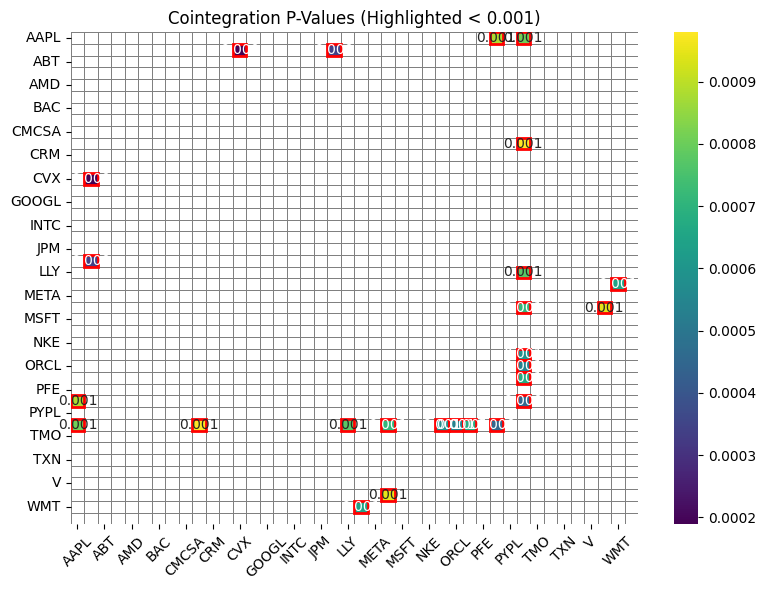

In [11]:
vis = Visualize()
vis.plot_pval_matrix(dist_matrix, threshold = 0.001)

2025-01-29 20:18:44,393 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-29 20:18:44,448 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-29 20:18:44,473 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-29 20:18:44,494 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


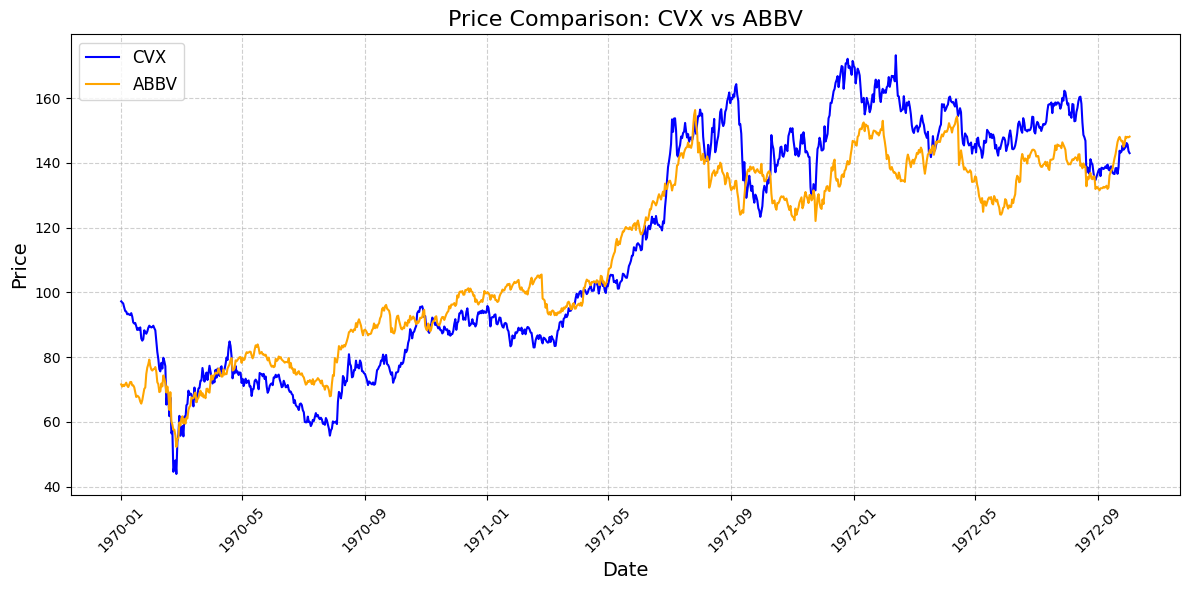

In [14]:
p_val = coint_pairs.values[0]
asset1 = coint_pairs.asset_1[0]
asset2 = coint_pairs.asset_2[0]


vis.plot_tickers(data,asset1,asset2)


2025-01-29 20:14:10,674 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-29 20:14:10,699 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


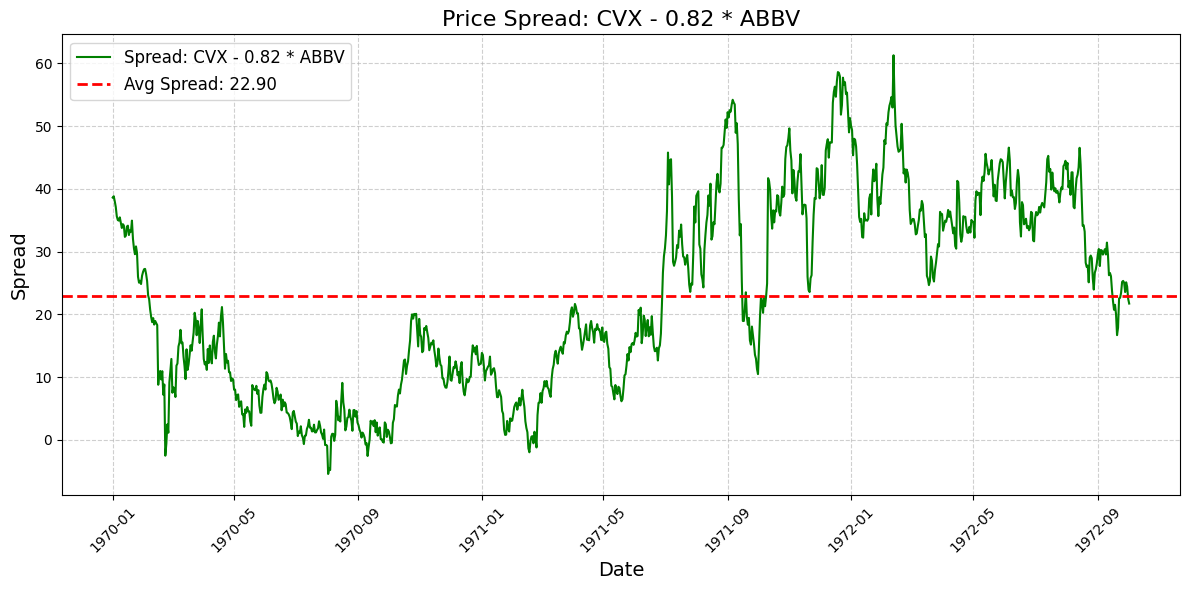

In [62]:
vis.plot_spread(data,asset1,asset2,beta_matrix)
# asset1


In [ ]:
# TODO: create strategy class (easy one) and test if it produce the signal
# TODO: implement other similarity measures and test them
# Create unit tests maybe
# Update class with attributes or make them better
# remember to choose in a more scientific way the way I am choosing my timeframe, some reasoning on backtesting
